# Introduction - SVM

SVM is the Supervised Machine Learning algorithm used for both classification, regression. But mostly preferred for classification.

Given a dataset, the algorithm tries to divide the data using hyperplanes and then makes the predictions. SVM is a non-probabilistic linear classifier. While other classifiers, when classifying, predict the probability of a data point to belong to one group or the another, SVM directly says to which group the datapoint belongs to without using any probability calculation.



How it works?
- SVM constructs a best line or the decision boundary called **Hyperplane** which can be used for classification or regression or outlier detection.  The dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane.

- This hyperplane creates 2 margin lines parallel to it which have some distance so that it can distinctly classify the data points. The distance between the 2 margin lines are called **marginal distance**.

- These 2 margin lines passes through the most nearest +ve points and the most nearest -ve points. Those points through which the margin lines pass are called **support vectors**. Support vectors are important as it helps to determine the maximum distance of the marginal plane.


## Understanding the Mathematics involved
Let’s take the example of the following dataset and see how can we divide the data into appropriate groups.
<img src='SVM_intution.PNG'  width="300">

We can see that there are two groups of data. The question is how to divide these points into two groups. It can be done using any of the three lines. Or, for that purpose, there can be an infinite number of straight lines that can divide these points into two classes. Now, which line to choose?
SVM solves this problem using the maximum margin as shown
<img src='SVM_hyperplane.PNG' width="400">


The black line in the middle is the optimum classifier. This line is drawn to maximise the distance of the classifier line from the nearest points in the two classes. It is also called a __hyperplane__ in terms of  SVM.
A _Hyperplane_ is an n-1 dimensional plane which optimally divides the data of n dimensions. Here, as we have only a 2-D data, so the hyperplane can be represented using one dimension only. Hence, the hyperplane is a line here.
The two points (highlighted with circles) which are on the yellow lines, they are called the __support vectors__. As it is a 2-D figure, they are points. In a multi-dimensional space, they will be vectors, and hence, the name- support vector machine as the algorithm creates the optimum classification line by maximising its distance from the two support vectors.

When the data is not linearly separable,  then to create a hyperplane to separate data into different groups, the SVM algorithm needs to perform computations in a higher-dimensional space. But the introduction of new dimensions makes the computations for the SVMs more intensive, which impacts the algorithm performance. To rectify this, mathematicians came up with the approach of Kernel methods.
Kernel methods use kernel functions available in mathematics. The unique feature of a kernel function is to compute in a higher-dimensional space without calculating the new coordinates in that higher dimension. It implicitly uses predefined mathematical functions to do operations on the existing points which mimic the computation in a higher-dimensional space without adding to the computation cost as they are not actually calculating the coordinates in the higher dimension thereby avoiding the computation of calculating distances from the newly computed points.  This is called the kernel trick.
<img src= "SVM_3D_Hyperplane.PNG" width="300">
                                                                        Image: bogotobogo.com


In the left diagram above, we have a non-linear distribution of data as we can not classify a data using a linear equation. To solve this problem, we can project the points in a 3-dimensional space and then derive a plane which divides the data into two parts. In theory, that’s what a kernel function does without computing the additional coordinates for the higher dimension.


## Support Vector Regression

Let’s talk about Linear Regression first. How to determine the best fit line? The idea is to create a line which minimises the total residual error. The SVR approach is a bit different. Instead of trying to minimise the error, SVR focuses on keeping the error in a fixed range. This approach can be explained using three lines. The first line is the best fit regressor line, and the other two lines are the bordering ones which denote the range of error.
<img src="SVR.PNG" width="500">

What does this mean? It means that we are going to consider the points inside this ± error boundary only for preparing our model. In other words, the best fit line(or the hyperplane) will be the line which goes through the maximum number of data points and the error boundaries are chosen to ensure maximum inclusion. This error term can be customized  using the '_epsilon_' parameter defined for the scikit-learn SVR implementation.  

## Python Implementation

### Business Case:-To find out based on given features whether the loan will get approved or not.

In [1]:
##importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
## loading the data
data=pd.read_csv('loan_approved.csv')

In [3]:
## Getting the first few rows of data
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
data.rename(columns={'Loan_Status (Approved)':'Loan_Status'},inplace=True)

In [5]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
# Domian analysis.

## Basic Checks

In [8]:
#head,tail,info,describe for both numerical and categorical

In [9]:
data.shape

(614, 13)

In [10]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
data.describe() # statistical summary of numeric data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [14]:
# # statistical summary of categorical data
data.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [15]:
data.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [16]:
data.Gender.value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [23]:
# fetch numerical columns
num_col=data.select_dtypes(include=['int64','float64']).columns
num_col

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [34]:
# fetch categorical columns
cat_col=data.select_dtypes(include=['object'])
cat_col.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [36]:
data.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [38]:
data.Gender.value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [40]:
# find unique categories in dataset
for i in cat_col.drop('Loan_ID',axis=1):
    print(i,data[i].unique())
    print(data[i].value_counts())
    print('******************')

Gender ['Male' 'Female' nan]
Gender
Male      489
Female    112
Name: count, dtype: int64
******************
Married ['No' 'Yes' nan]
Married
Yes    398
No     213
Name: count, dtype: int64
******************
Dependents ['0' '1' '2' '3+' nan]
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
******************
Education ['Graduate' 'Not Graduate']
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
******************
Self_Employed ['No' 'Yes' nan]
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
******************
Property_Area ['Urban' 'Rural' 'Semiurban']
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
******************
Loan_Status ['Y' 'N']
Loan_Status
Y    422
N    192
Name: count, dtype: int64
******************


In [42]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Exploratory Data Analysis

In [45]:
data.shape

(614, 13)

In [47]:
# Univariate analysis
# Bivaraite analysis--Autoviz

<Axes: xlabel='Gender', ylabel='count'>

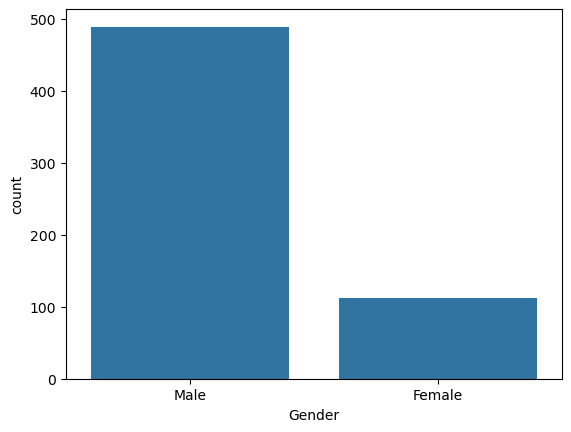

In [49]:
sns.countplot(x='Gender',data=data)

In [50]:
!pip install sweetviz

In [52]:
import sweetviz as sv #  library for univariant analysis

my_report = sv.analyze(data)## pass the original dataframe

my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [53]:
# This cell is used in google colab
import sweetviz as sv #  library for univariant analysis

my_report = sv.analyze(data)## pass the original dataframe

my_report.show_html('myreport.html') # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report myreport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [54]:
## Bivariate Analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [55]:
# Create dataframe which includes categorical data
data1=data[['Gender','Married','Dependents','Education','Self_Employed','Property_Area']]
# Create dataframe which includes numerical data
data2=data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]

In [56]:
data1.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban


In [57]:
data2.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


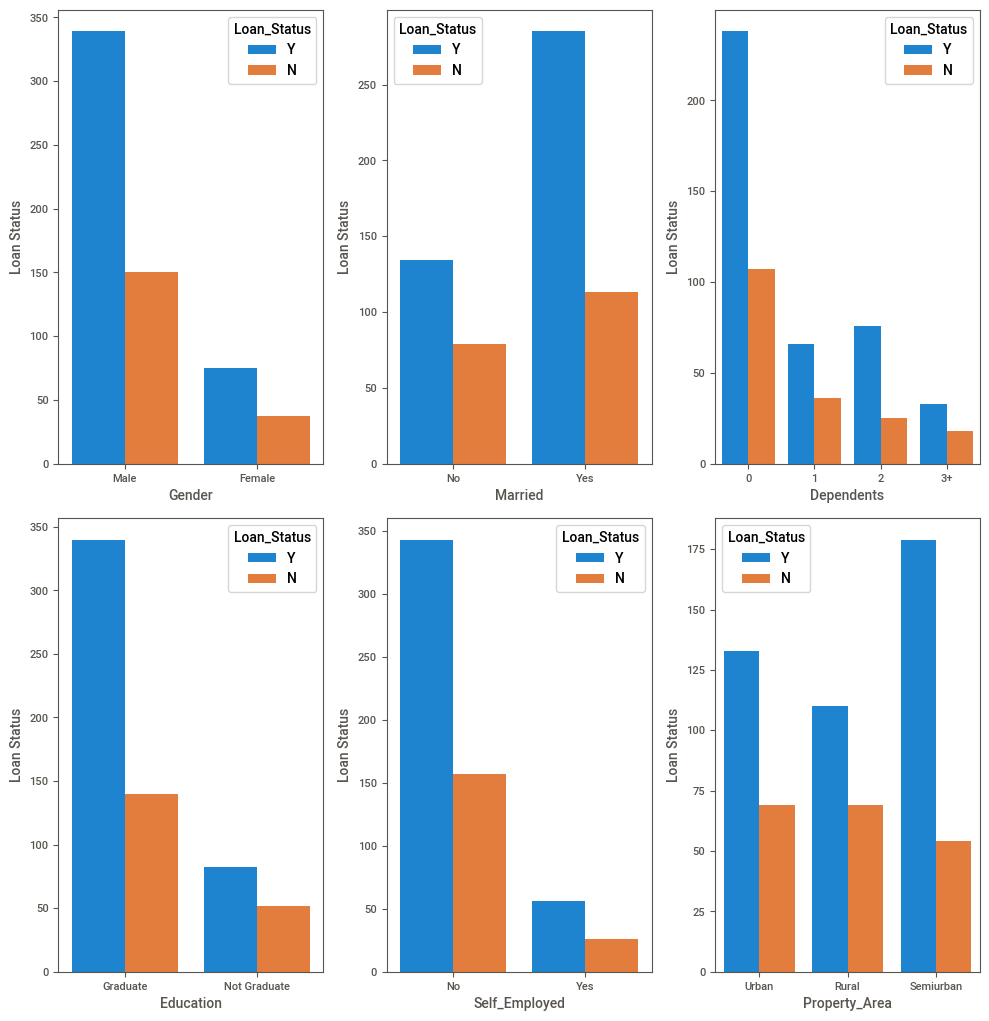

In [58]:
plt.figure(figsize=(10,15), facecolor='white')#To set canvas
plotnumber = 1#counter

for column in data1:#accessing the categorical columns
    if plotnumber<=6 :
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(x=data1[column],hue=data['Loan_Status'])
        plt.xlabel(column,fontsize=10)#assign name to x-axis and set font-20
        plt.ylabel('Loan Status',fontsize=10)
    plotnumber+=1#counter increment
plt.tight_layout()

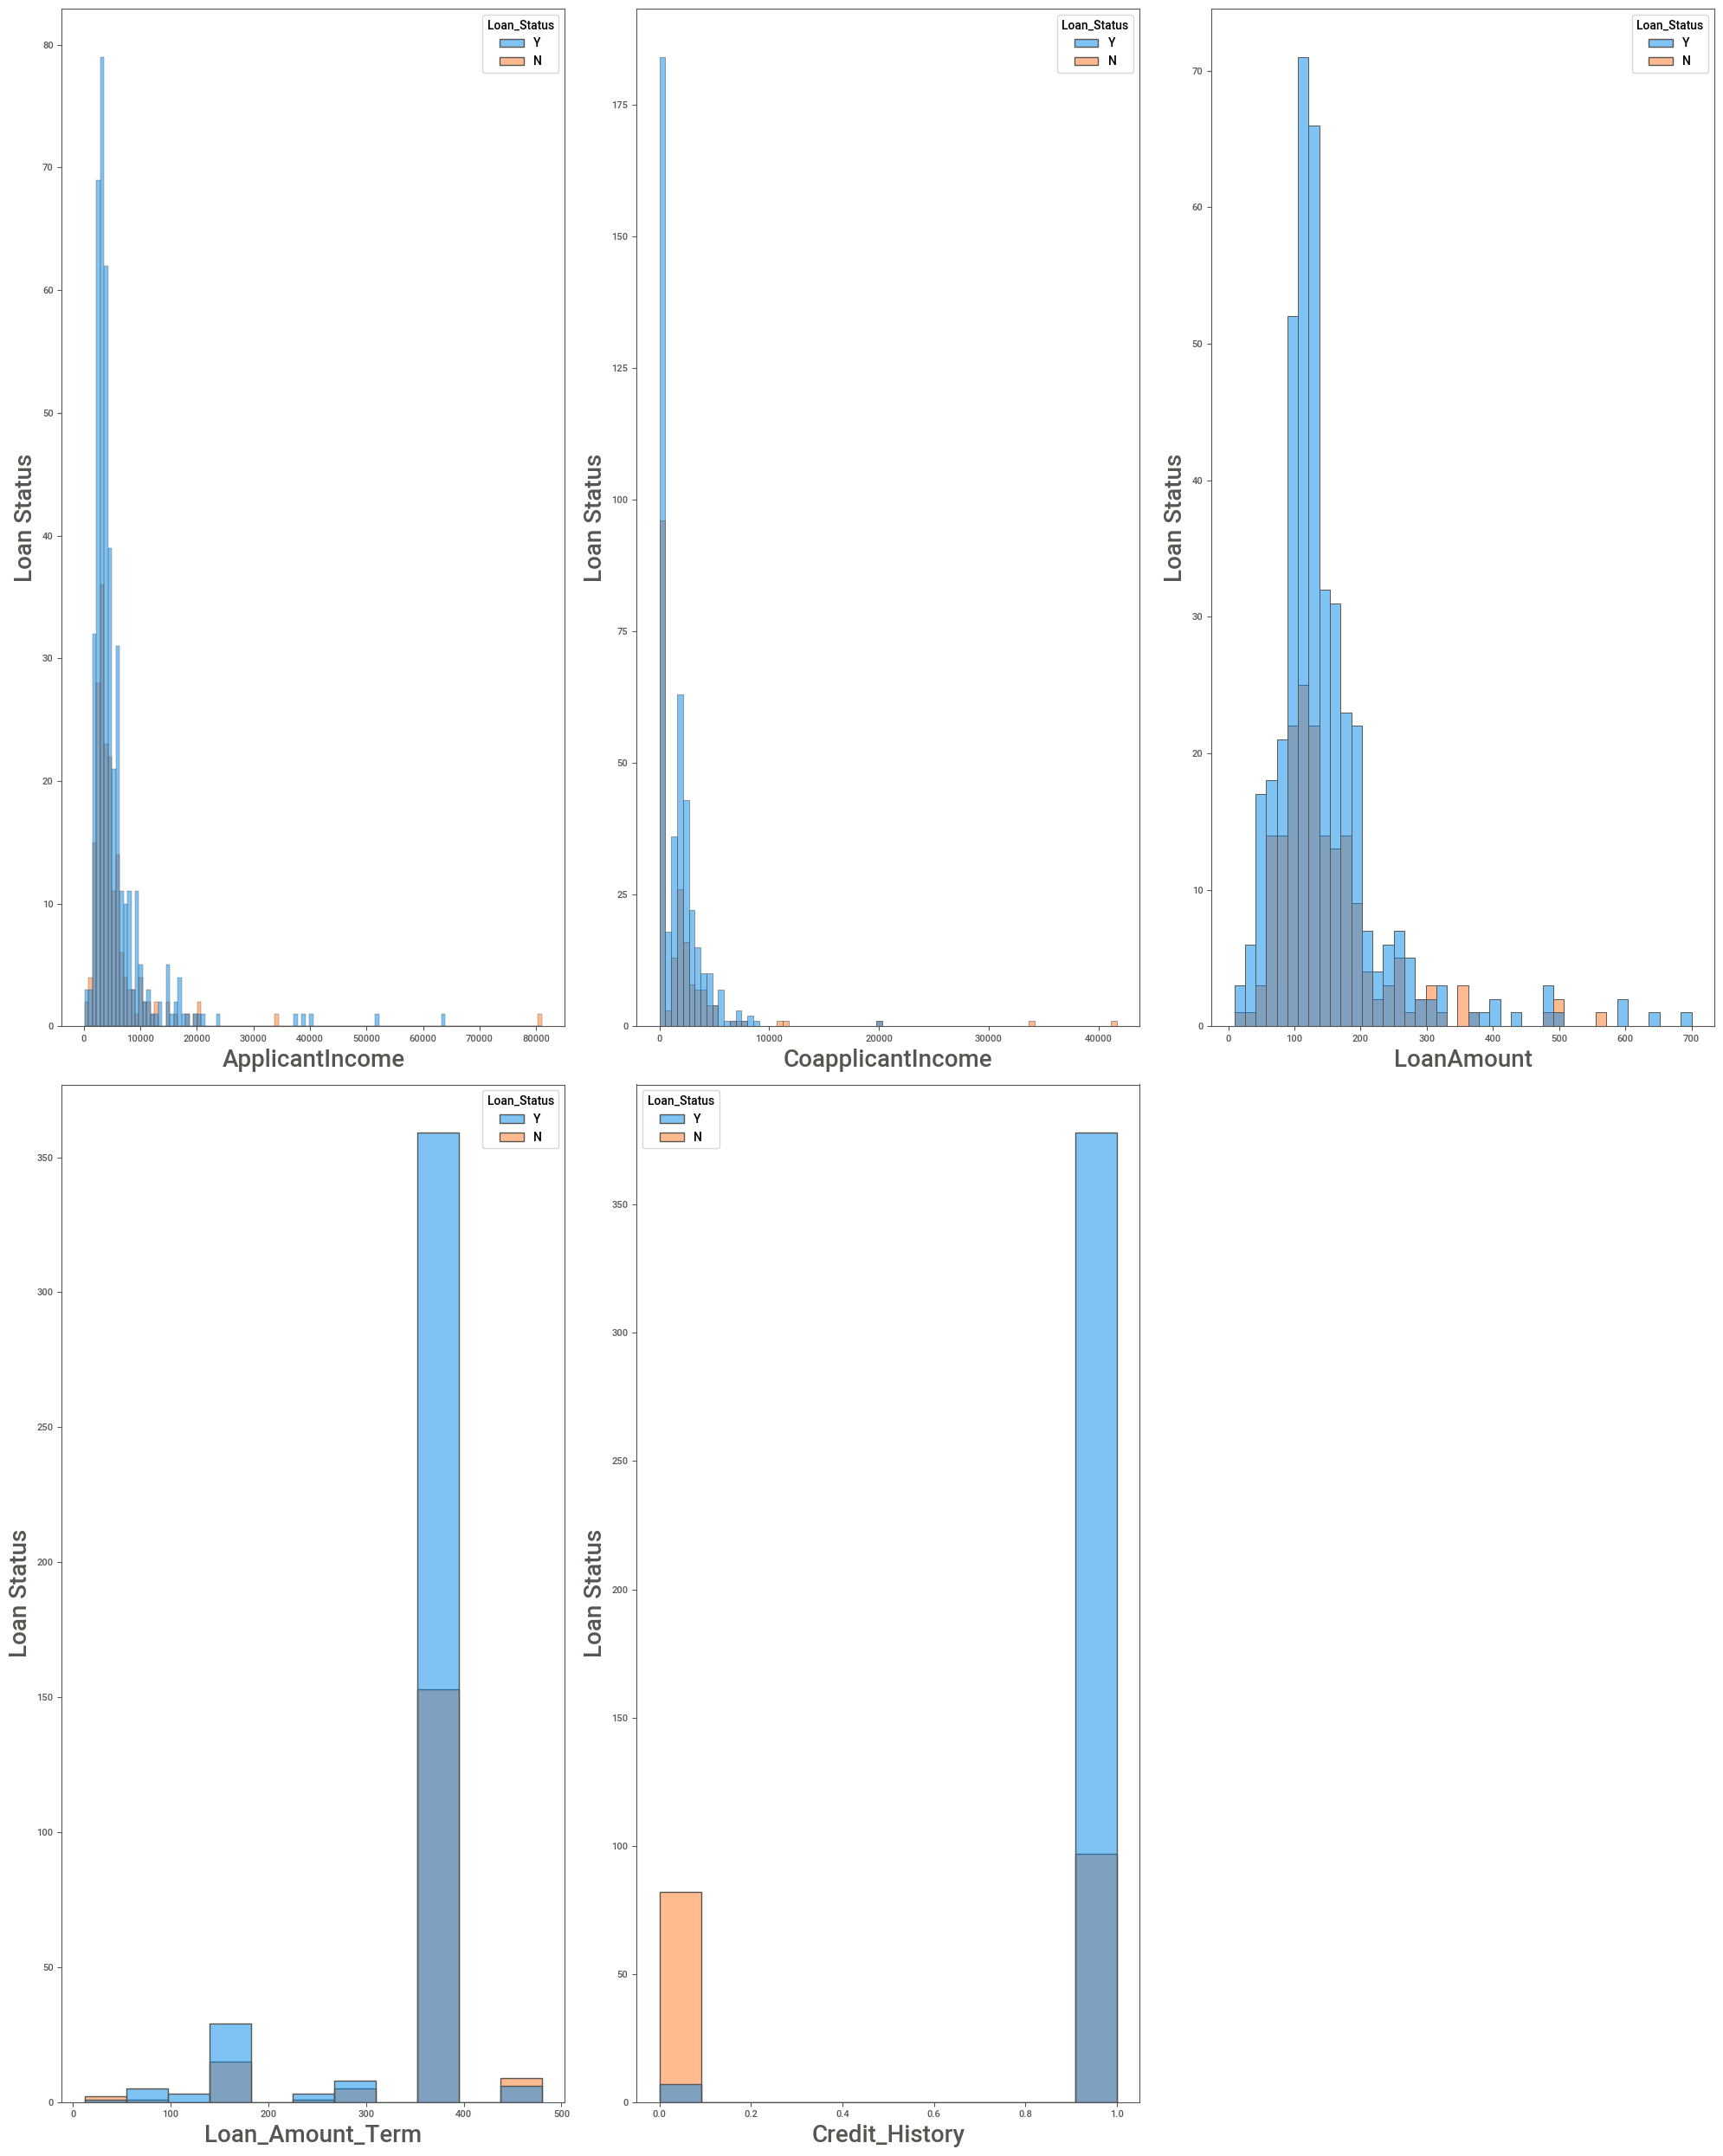

In [59]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas
plotnumber = 1#counter

for column in data2:#accessing the numerical columns
    if plotnumber<=6 :
        ax = plt.subplot(2,3,plotnumber)
        sns.histplot(x=data2[column],hue=data['Loan_Status'])
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('Loan Status',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

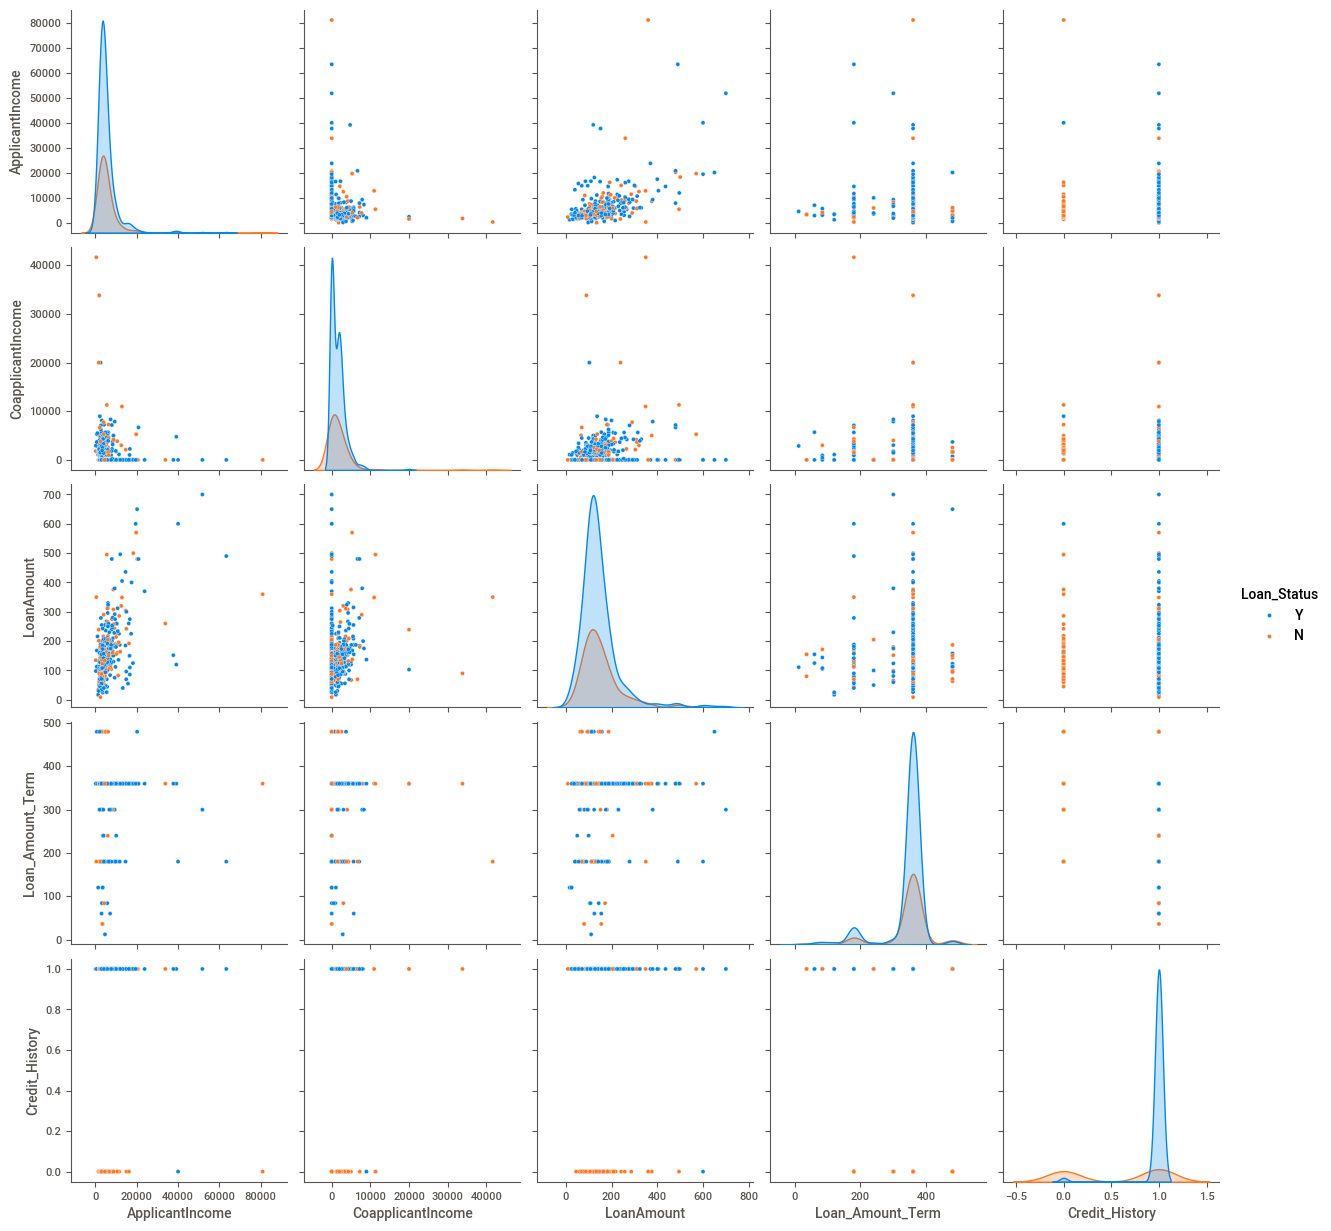

In [60]:
# Multivariate analysis
sns.pairplot(data,hue='Loan_Status')

## Data Preprocessing Pipeline

In [62]:
## Checking missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [63]:
len(data)

614

In [64]:
13/614*100

2.1172638436482085

In [65]:
## How much values have been missed
data.isnull().sum()/len(data)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

### HAndle missing values in Gender

In [68]:
data.Gender.dtypes

dtype('O')

In [69]:
data.Gender.value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [70]:
data['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [71]:
## Getting the rows where values are missed in Gender features
data.loc[data['Gender'].isnull()==True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [72]:
## Imputing the missing values with mode
data.loc[data['Gender'].isnull()==True,'Gender']='Male'

In [73]:
data.Gender.isnull().sum()

0

<Axes: xlabel='Gender', ylabel='count'>

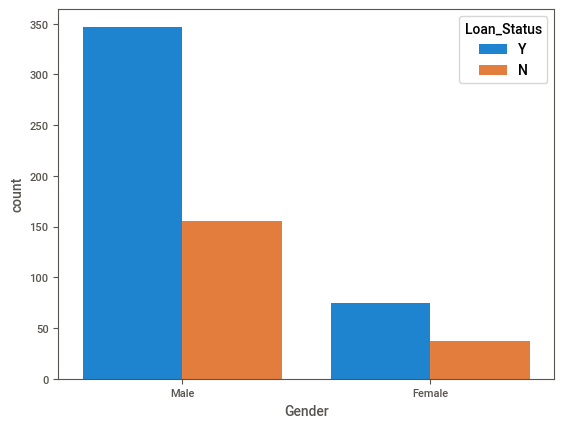

In [74]:
sns.countplot(data=data,x='Gender',hue='Loan_Status')

In [75]:
data.Dependents.dtypes

dtype('O')

In [76]:
data['Dependents'].mode()

0    0
Name: Dependents, dtype: object

In [78]:
## Getting the values in Dependents
data.loc[data['Dependents'].isnull()==True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


<Axes: xlabel='Dependents', ylabel='count'>

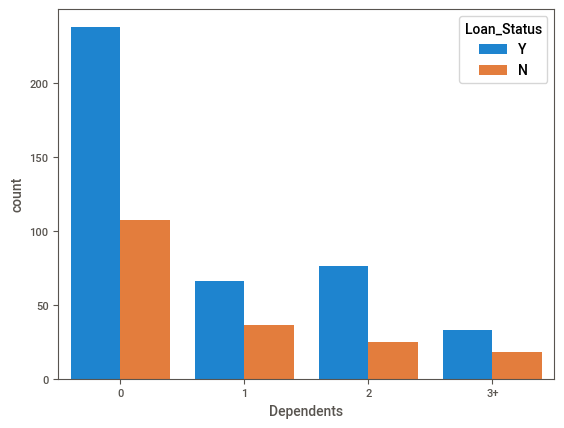

In [79]:
sns.countplot(data=data,x='Dependents',hue='Loan_Status')

In [80]:
# From the graphical representation it can be seen that as the number of dependents
#getting increased,the chances of approval is less, since we have missing values and if we approve
# loan for them who has 0 dependent it can turn into major loss(high chance).Hence we will substitue missing values
#by 3+ for possible rejection.
data.loc[data['Dependents'].isnull()==True,'Dependents']='3+'

In [81]:
data.Dependents.isnull().sum()

0

In [87]:
data.Married.dtypes

dtype('O')

In [89]:
data.Married.mode()

0    Yes
Name: Married, dtype: object

In [90]:
## For married feature
data.loc[data['Married'].isnull()==True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,3+,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,3+,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,3+,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [91]:
## Imputing with yes i.e mode
data.loc[data['Married'].isnull()==True,'Married']='Yes'

In [92]:
data.Married.isnull().sum()

0

In [93]:
data.Self_Employed.dtypes

dtype('O')

In [94]:
## selfemployed column
data.Self_Employed.mode()

0    No
Name: Self_Employed, dtype: object

In [97]:
## Checking Self_Employed
data.loc[data['Self_Employed'].isnull()==True]
#data.loc[data['Self_Employed']=='No']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


In [98]:
data.loc[data['Self_Employed'].isnull()==True,'Self_Employed']='No'

In [99]:
data.Self_Employed.isnull().sum()

0

In [100]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [101]:
data.LoanAmount.dtypes

dtype('float64')

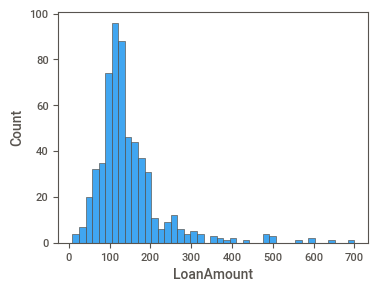

In [102]:
## Histogram since it has numerical value
plt.figure(figsize=(4,3))
sns.histplot(data=data,x='LoanAmount')
plt.show()

Since data is skewed, we can use median to replace the nan value. It is recommended to use mean only for symmetric data distribution.

In [104]:
# Check median for LoanAmount column
data['LoanAmount'].median()

128.0

In [105]:
# Replace the nan values in LoanAmount column with median value
data.loc[data['LoanAmount'].isnull()==True,'LoanAmount']=data['LoanAmount'].median()

In [106]:
data.LoanAmount.isnull().sum()

0

### Loan amount term

In [108]:
data.Loan_Amount_Term.dtypes

dtype('float64')

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

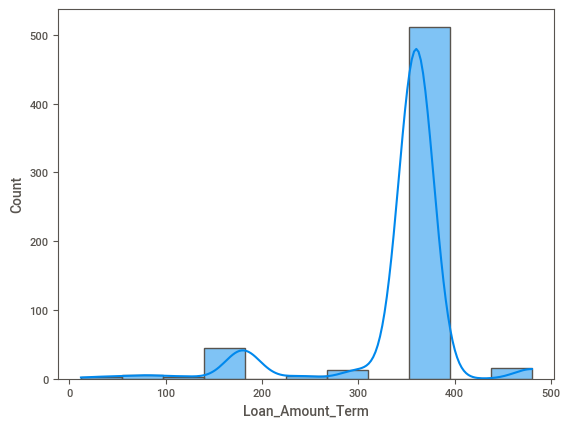

In [109]:
sns.histplot(data=data,x='Loan_Amount_Term',kde=True)

In [110]:
data.Loan_Amount_Term.median()

360.0

In [111]:
# replace the nan values in Loan_Amount_Term with the median value
data.loc[data['Loan_Amount_Term'].isnull()==True,'Loan_Amount_Term']=data.Loan_Amount_Term.median()

In [117]:
data.Loan_Amount_Term.isnull().sum()

0

In [127]:
# Credit_History
data.Credit_History.dtypes

dtype('float64')

In [139]:
data.Credit_History.value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [150]:
data.Credit_History.median()

1.0

<Axes: xlabel='Credit_History', ylabel='count'>

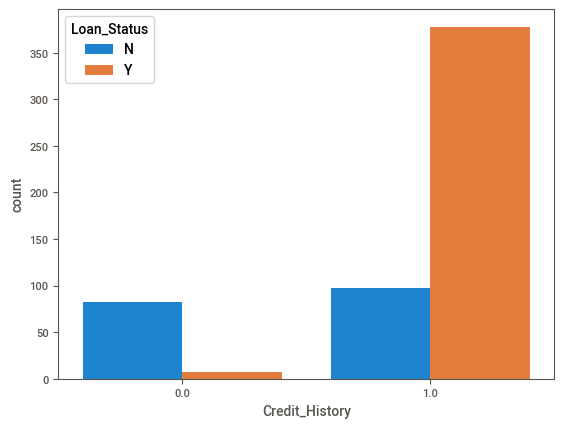

In [155]:
sns.countplot(x='Credit_History',data=data,hue='Loan_Status')

In [157]:
data.Credit_History.value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [159]:
data.loc[data['Credit_History'].isnull()==True,'Credit_History']=0.0

In [164]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [166]:
# Check for duplicates
data.duplicated().sum()

0

### Handling outliers

In [169]:
num_col


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

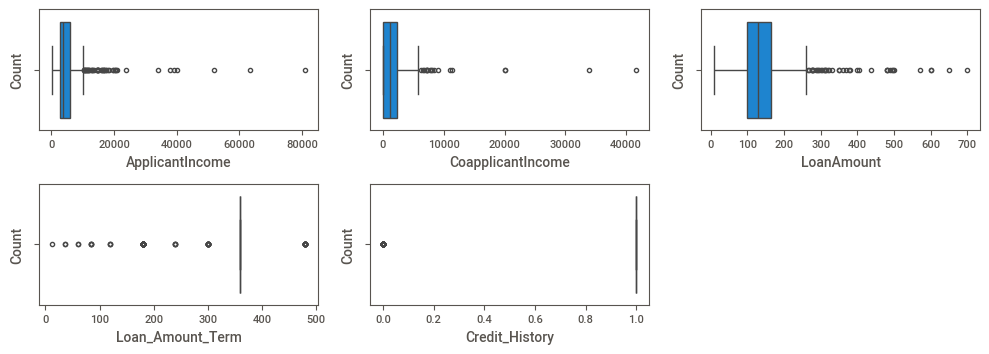

In [171]:
plt.figure(figsize=(10,5),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Count',fontsize=10)
    plotnumber+=1
plt.tight_layout()

### Scaling

In [174]:
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [176]:
## scaling data
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]=scale.fit_transform(data[['ApplicantIncome','CoapplicantIncome',
                          'LoanAmount']])



In [178]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.070489,0.000000,0.172214,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,0.054830,0.036192,0.172214,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,0.035250,0.000000,0.082489,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,0.030093,0.056592,0.160637,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.072356,0.000000,0.191027,360.0,1.0,Urban,Y


In [180]:
## Step 2 Handling the categorical data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [182]:
data1=data.copy()

In [184]:
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.070489,0.000000,0.172214,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,0.054830,0.036192,0.172214,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,0.035250,0.000000,0.082489,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,0.030093,0.056592,0.160637,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.072356,0.000000,0.191027,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,0.034014,0.000000,0.089725,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,0.048930,0.000000,0.044863,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,0.097984,0.005760,0.353111,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,0.091936,0.000000,0.257598,360.0,1.0,Urban,Y


In [186]:
## Using label encoder to convert the categorical data to numerical data
## Donot run this code.This is just implementation of label encoder.This dataset have lots relationship with target.
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder() # object creation

data1.Gender=lc.fit_transform(data1.Gender)
data1.Married=lc.fit_transform(data1.Married)
#data1.Education=lc.fit_transform(data1.Education)
#data1.Property_Area=lc.fit_transform(data1.Property_Area)
#data1.Loan_Status=lc.fit_transform(data1.Loan_Status)
#data1.Dependents=lc.fit_transform(data1.Dependents)
#data1.Self_Employed=lc.fit_transform(data1.Self_Employed)

In [188]:
data1.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,Graduate,No,0.070489,0.000000,0.172214,360.0,1.0,Urban,Y
1,LP001003,1,1,1,Graduate,No,0.054830,0.036192,0.172214,360.0,1.0,Rural,N
2,LP001005,1,1,0,Graduate,Yes,0.035250,0.000000,0.082489,360.0,1.0,Urban,Y


In [190]:
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.070489,0.000000,0.172214,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,0.054830,0.036192,0.172214,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,0.035250,0.000000,0.082489,360.0,1.0,Urban,Y


### Get dummies

In [193]:
data2=data.copy()

In [195]:
data2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.070489,0.000000,0.172214,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,0.054830,0.036192,0.172214,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,0.035250,0.000000,0.082489,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,0.030093,0.056592,0.160637,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.072356,0.000000,0.191027,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,0.034014,0.000000,0.089725,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,0.048930,0.000000,0.044863,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,0.097984,0.005760,0.353111,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,0.091936,0.000000,0.257598,360.0,1.0,Urban,Y


In [197]:
#data['Gender'] = data['Gender'].astype('category')


In [199]:
pd.get_dummies(data['Gender'],prefix='Gender',dtype='int')

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
609,1,0
610,0,1
611,0,1
612,0,1


In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [203]:
#data['Gender'] = data['Gender'].astype('category')


In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [207]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.070489,0.000000,0.172214,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,0.054830,0.036192,0.172214,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,0.035250,0.000000,0.082489,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,0.030093,0.056592,0.160637,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.072356,0.000000,0.191027,360.0,1.0,Urban,Y


In [209]:
## One hot encoding
df1=pd.get_dummies(data2['Gender'],prefix='Gender',drop_first=True,dtype='int')
data2=pd.concat([data2,df1],axis=1).drop(['Gender'],axis=1)

In [211]:
df1

,Gender_Male
0,1
1,1
2,1
3,1
4,1
...,...
609,0
610,1
611,1
612,1


In [213]:
data2.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male
0,LP001002,No,0,Graduate,No,0.070489,0.000000,0.172214,360.0,1.0,Urban,Y,1
1,LP001003,Yes,1,Graduate,No,0.054830,0.036192,0.172214,360.0,1.0,Rural,N,1
2,LP001005,Yes,0,Graduate,Yes,0.035250,0.000000,0.082489,360.0,1.0,Urban,Y,1
3,LP001006,Yes,0,Not Graduate,No,0.030093,0.056592,0.160637,360.0,1.0,Urban,Y,1
4,LP001008,No,0,Graduate,No,0.072356,0.000000,0.191027,360.0,1.0,Urban,Y,1


In [215]:
data.Married.value_counts()

Married
Yes    401
No     213
Name: count, dtype: int64

In [217]:
df1=pd.get_dummies(data2['Married'],prefix='Married',drop_first=True,dtype='int')
data2=pd.concat([data2,df1],axis=1).drop(['Married'],axis=1)

In [219]:
data2.head(3)

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes
0,LP001002,0,Graduate,No,0.070489,0.000000,0.172214,360.0,1.0,Urban,Y,1,0
1,LP001003,1,Graduate,No,0.054830,0.036192,0.172214,360.0,1.0,Rural,N,1,1
2,LP001005,0,Graduate,Yes,0.035250,0.000000,0.082489,360.0,1.0,Urban,Y,1,1


In [221]:
df1=pd.get_dummies(data['Education'],prefix='Education',drop_first=True,dtype='int')
data2=pd.concat([data2,df1],axis=1).drop(['Education'],axis=1)

In [223]:
data2.head(1)

,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate
0,LP001002,0,No,0.070489,0.0,0.172214,360.0,1.0,Urban,Y,1,0,0


In [225]:
df1=pd.get_dummies(data['Property_Area'],prefix='Property_Area',drop_first=True,dtype='int')
data2=pd.concat([data2,df1],axis=1).drop(['Property_Area'],axis=1)

In [227]:
data2.head()

,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,No,0.070489,0.000000,0.172214,360.0,1.0,Y,1,0,0,0,1
1,LP001003,1,No,0.054830,0.036192,0.172214,360.0,1.0,N,1,1,0,0,0
2,LP001005,0,Yes,0.035250,0.000000,0.082489,360.0,1.0,Y,1,1,0,0,1
3,LP001006,0,No,0.030093,0.056592,0.160637,360.0,1.0,Y,1,1,1,0,1
4,LP001008,0,No,0.072356,0.000000,0.191027,360.0,1.0,Y,1,0,0,0,1


In [229]:
df1=pd.get_dummies(data['Dependents'],prefix='Dependents',drop_first=True,dtype='int')
data2=pd.concat([data2,df1],axis=1).drop(['Dependents'],axis=1)

In [231]:
df1=pd.get_dummies(data['Self_Employed'],prefix='Self_Employed',drop_first=True,dtype='int')
data2=pd.concat([data2,df1],axis=1).drop(['Self_Employed'],axis=1)

In [233]:
data2.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes
0,LP001002,0.070489,0.000000,0.172214,360.0,1.0,Y,1,0,0,0,1,0,0,0,0
1,LP001003,0.054830,0.036192,0.172214,360.0,1.0,N,1,1,0,0,0,1,0,0,0
2,LP001005,0.035250,0.000000,0.082489,360.0,1.0,Y,1,1,0,0,1,0,0,0,1
3,LP001006,0.030093,0.056592,0.160637,360.0,1.0,Y,1,1,1,0,1,0,0,0,0
4,LP001008,0.072356,0.000000,0.191027,360.0,1.0,Y,1,0,0,0,1,0,0,0,0


In [235]:
## Saving the preprocessed data.
data2.to_csv('Preprocessed_data.csv')

In [237]:
## Loading the data
pre_data=pd.read_csv('Preprocessed_data.csv')

In [239]:
pre_data

,Unnamed: 0,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes
0,0,LP001002,0.070489,0.000000,0.172214,360.0,1.0,Y,1,0,0,0,1,0,0,0,0
1,1,LP001003,0.054830,0.036192,0.172214,360.0,1.0,N,1,1,0,0,0,1,0,0,0
2,2,LP001005,0.035250,0.000000,0.082489,360.0,1.0,Y,1,1,0,0,1,0,0,0,1
3,3,LP001006,0.030093,0.056592,0.160637,360.0,1.0,Y,1,1,1,0,1,0,0,0,0
4,4,LP001008,0.072356,0.000000,0.191027,360.0,1.0,Y,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,LP002978,0.034014,0.000000,0.089725,360.0,1.0,Y,0,0,0,0,0,0,0,0,0
610,610,LP002979,0.048930,0.000000,0.044863,180.0,1.0,Y,1,1,0,0,0,0,0,1,0
611,611,LP002983,0.097984,0.005760,0.353111,360.0,1.0,Y,1,1,0,0,1,1,0,0,0
612,612,LP002984,0.091936,0.000000,0.257598,360.0,1.0,Y,1,1,0,0,1,0,1,0,0


## Feature Selection

In [242]:
!pip install seaborn --upgrade

In [243]:
pre_data.head()

,Unnamed: 0,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes
0,0,LP001002,0.070489,0.000000,0.172214,360.0,1.0,Y,1,0,0,0,1,0,0,0,0
1,1,LP001003,0.054830,0.036192,0.172214,360.0,1.0,N,1,1,0,0,0,1,0,0,0
2,2,LP001005,0.035250,0.000000,0.082489,360.0,1.0,Y,1,1,0,0,1,0,0,0,1
3,3,LP001006,0.030093,0.056592,0.160637,360.0,1.0,Y,1,1,1,0,1,0,0,0,0
4,4,LP001008,0.072356,0.000000,0.191027,360.0,1.0,Y,1,0,0,0,1,0,0,0,0


In [244]:
# Removing redundant columns
#We can drop loan id.
l1=['Unnamed: 0','Loan_ID']
pre_data.drop(l1,axis=1,inplace=True)

In [245]:
pre_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes
0,0.070489,0.000000,0.172214,360.0,1.0,Y,1,0,0,0,1,0,0,0,0
1,0.054830,0.036192,0.172214,360.0,1.0,N,1,1,0,0,0,1,0,0,0
2,0.035250,0.000000,0.082489,360.0,1.0,Y,1,1,0,0,1,0,0,0,1
3,0.030093,0.056592,0.160637,360.0,1.0,Y,1,1,1,0,1,0,0,0,0
4,0.072356,0.000000,0.191027,360.0,1.0,Y,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.034014,0.000000,0.089725,360.0,1.0,Y,0,0,0,0,0,0,0,0,0
610,0.048930,0.000000,0.044863,180.0,1.0,Y,1,1,0,0,0,0,0,1,0
611,0.097984,0.005760,0.353111,360.0,1.0,Y,1,1,0,0,1,1,0,0,0
612,0.091936,0.000000,0.257598,360.0,1.0,Y,1,1,0,0,1,0,1,0,0


In [246]:
## checking correlation
corr_data=pre_data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

In [247]:
corr_data

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.070489,0.000000,0.172214
1,0.054830,0.036192,0.172214
2,0.035250,0.000000,0.082489
3,0.030093,0.056592,0.160637
4,0.072356,0.000000,0.191027
...,...,...,...
609,0.034014,0.000000,0.089725
610,0.048930,0.000000,0.044863
611,0.097984,0.005760,0.353111
612,0.091936,0.000000,0.257598


<Axes: >

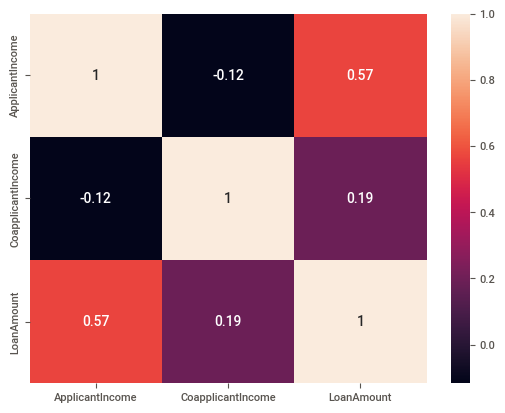

In [248]:
sns.heatmap(corr_data.corr(),annot=True)

In [249]:
## There is no relationship among the numerical data

In [250]:
pre_data.Loan_Status=pre_data.Loan_Status.map({'Y':1,'N':0})

In [251]:
pre_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes
0,0.070489,0.000000,0.172214,360.0,1.0,1,1,0,0,0,1,0,0,0,0
1,0.054830,0.036192,0.172214,360.0,1.0,0,1,1,0,0,0,1,0,0,0
2,0.035250,0.000000,0.082489,360.0,1.0,1,1,1,0,0,1,0,0,0,1
3,0.030093,0.056592,0.160637,360.0,1.0,1,1,1,1,0,1,0,0,0,0
4,0.072356,0.000000,0.191027,360.0,1.0,1,1,0,0,0,1,0,0,0,0


## Model Creation

In [253]:
pre_data.head(1)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes
0,0.070489,0.0,0.172214,360.0,1.0,1,1,0,0,0,1,0,0,0,0


In [254]:
pre_data.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Male',
       'Married_Yes', 'Education_Not Graduate', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Self_Employed_Yes'],
      dtype='object')

In [255]:
## defining X and y
X=pre_data.loc[:,['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History','Gender_Male',
       'Married_Yes', 'Education_Not Graduate', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Self_Employed_Yes']]
y=pre_data.Loan_Status

In [256]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes
0,0.070489,0.000000,0.172214,360.0,1.0,1,0,0,0,1,0,0,0,0
1,0.054830,0.036192,0.172214,360.0,1.0,1,1,0,0,0,1,0,0,0
2,0.035250,0.000000,0.082489,360.0,1.0,1,1,0,0,1,0,0,0,1
3,0.030093,0.056592,0.160637,360.0,1.0,1,1,1,0,1,0,0,0,0
4,0.072356,0.000000,0.191027,360.0,1.0,1,0,0,0,1,0,0,0,0


In [257]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [258]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.20,random_state=3)

In [259]:
X_train.shape

(491, 14)

In [260]:
## balancing the data
pre_data.Loan_Status.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [261]:
!pip install -U imbalanced-learn

In [264]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [266]:
# Install imblearn package - pip install imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [270]:
#Smote is always applied on training data
X_smote, y_smote = smote.fit_resample(X_train,y_train)

**Counter** is a container which keeps track to how many times equivalent values are added. Python counter class is a part of collections module and is a subclass of dictionary.

In [284]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({1: 327, 0: 164})
SMOTE Classes Counter({1: 327, 0: 327})


In [285]:
# Support Vector Classifier Model

from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_smote, y_smote)

SVC()

In [286]:
# Predict output for X_test
y_hat=svclassifier.predict(X_test)

In [287]:
y_hat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [288]:
y_test

455    1
132    1
244    1
53     0
264    1
      ..
544    1
129    0
360    0
446    1
321    1
Name: Loan_Status, Length: 123, dtype: int64

In [289]:
## evaluating the model created
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_hat)
acc

0.7723577235772358

In [290]:
# F1 score considers both Precision and Recall for evaluating a model
f1=f1_score(y_test,y_hat)
f1

0.8691588785046729

In [291]:
# Calssification report measures the quality of predictions. True Positives, False Positives, True negatives and False Negatives
# are used to predict the metrics of a classification report

print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.50      0.07      0.12        28
           1       0.78      0.98      0.87        95

    accuracy                           0.77       123
   macro avg       0.64      0.53      0.50       123
weighted avg       0.72      0.77      0.70       123



In [292]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svclassifier,X,y,cv=5,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good.

[0.81730769 0.81730769 0.8115942  0.8115942  0.81553398]
Cross validation Score: 0.814667554199002
Std : 0.00259161453831203


## What is a Model Hyperparameter?

A model hyperparameter is a configuration that is external to the model and whose value cannot be estimated from data.



## Hyperparameters of Support Vector Machine

#### SVM separates data points that belong to different classes with a decision b  ndary. When determining the decision boundary, a soft margin SVM (soft margin means allowing some data points to be misclassified) tries to solve an optimization problem with the following goals:

#### 1)Increase the distance of decision boundary to classes (or support vectors)
#### 2)Maximize the number of points that are correctly classified in the training set

### There is obviously a trade-off between these two goals which and it is controlled by C which adds a penalty for each misclassified data point.

### If C is small, the penalty for misclassified points is low so a decision boundary with a large margin is chosen at the expense of a greater number of misclassification.

### If C is large, SVM tries to minimize the number of misclassified examples due to the high penalty which results in a decision boundary with a smaller margin. The penalty is not the same for all misclassified examples. It is directly proportional to the distance to the decision boundary.

<img src='1_XFtyzSNjexMecQ4wmqBfgA.PNG'  width="300">

<img src='1_k4wh7vzjDbQWXx7wKyH0kg.PNG'  width="600">



### Gamma is a hyperparameter used with non-linear SVM. One of the most commonly used non-linear kernels is the radial basis function (RBF). Gamma parameter of RBF controls the distance of the influence of a single training point.

### Low values of gamma indicate a large similarity radius which results in more points being grouped together.

### For high values of gamma, the points need to be very close to each other in order to be considered in the same group (or class). Therefore, models with very large gamma values tend to overfit.

<img src='1_JDSwT-svWnAu69fy9oguBw.png' width="600">


<img src='1_faj7x1I0uFwfU6mkLfUwvg.png' width="600">

<img src='1_5DtPKUzLI1e-FIjC-odFiw.png' width="600">

## GridSearchCV

#### It is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. As mentioned above, the performance of a model significantly depends on the value of hyperparameters

#### Doing this manually could take a considerable amount of time and resources and thus we use GridSearchCV to automate the tuning of hyperparameters.

#### GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.

In [307]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 5, 10,50,60,70],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'random_state':(list(range(1, 20)))}
model=SVC()
grid = GridSearchCV(model, param_grid, refit = True, verbose = 2,scoring='f1',cv=5)

# fitting the model for grid search
grid.fit(X,y)

Fitting 5 folds for each of 570 candidates, totalling 2850 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.0s
[CV] END .....................C=0.1, gamma=1,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=2)

In [309]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 5, 'gamma': 0.1, 'random_state': 1}


In [311]:
#clf=SVC(C=100, gamma=0.001,random_state=42) ##0.1
clf=SVC(C=5, gamma=0.1,random_state=1) ##0.1

In [313]:
clf.fit(X_smote, y_smote)

SVC(C=5, gamma=0.1, random_state=1)

In [315]:
y_clf=clf.predict(X_test)

In [317]:
accuracy_score(y_test,y_clf)

0.7560975609756098

In [319]:
f1=f1_score(y_test,y_clf)
f1

0.8387096774193549

In [ ]:
print(classification_report(y_test,y_clf))

In [ ]:
scores_after = cross_val_score(clf,X,y,cv=3,scoring='f1')
print(scores_after)
print("Cross validation Score:",scores_after.mean())
print("Std :",scores.std())
#std of < 0.05 is good.

# If you can see f1 score is improved however the recall is still lagging.

# Task:-Change the all preprocessing technqiue and try to see if performance can be improved for not.

# We still have ot gone through feature selection technqiue.


In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [2,4,6,12,23],
              'gamma': [0.0011, 0.12, 0.101, 0.4001, 0.50001],
             'random_state':(list(range(1, 10)))}
svc1 =SVC()
grid = GridSearchCV(svc1, param_grid, refit = True, verbose = 2,scoring='f1',cv=5)

# fitting the model for grid search
grid.fit(X,y)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

In [ ]:
clf1=SVC(C=4, gamma=0.12,random_state=1)

In [ ]:
clf1.fit(X_smote, y_smote)

In [ ]:
y_clf1=clf1.predict(X_test)

In [ ]:
y_clf1=clf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_clf1)

In [ ]:
f11=f1_score(y_test,y_clf1)
f11

In [ ]:
scores_after = cross_val_score(clf1,X,y,cv=5,scoring='f1')
print(scores_after)
print("Cross validation Score:",scores_after.mean())
print("Std :",scores.std())
#std of < 0.05 is good.